# Testy normalności

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats as sm_stats
from scipy import stats

Jednym z podstawowych kryteriów stosowalności technik statystycznych jest **rozkład danych**, do którego konkretna technika zostanie użyta. 

W podstawowych zastosowaniach interesuje nas właściwie jedynie czy rozkład populacji jest normalny, czy nie. Rozkład populacji staramy się ustalić na podstawie zebranej próby, więc w tym celu stosujemy odpowiednie testy statystyczne. 

Najbardziej uniwersalnym i w obecnych czasach najbardziej rozpowszechnionym testem używanym do tego celu jest **test Shapiro-Wilka**.

## Testy normalności - test Shapiro-Wilka
$$\begin{equation*}
\begin{split}
    H_0&: \text{rozkład badanej cechy jest normalny}\\
    H_1&: \text{rozkład badanej cechy nie jest normalny}
\end{split}
\end{equation*}$$

Statystyka testowa **testu Shapiro-Wilka** dana jest wzorem:
\begin{equation*}
    T = \frac{\Big( \sum_{i=1}^{[\frac{n}{2}]}a_i(n)(X_{n-i+1:n} - X_{i:n} \Big)^2}{\sum_{i=1}^n(X_i - \overline{X})^2},
\end{equation*}
gdzie $a_i(n)$ są pewnymi stałymi zależnymi od liczności próby, natomiast $[n/2]$ oznacza część całkowitą wyrażenia $n/2$.

Obszar krytyczny ma postać
\begin{equation*}
    W_{\alpha} = (0, w(\alpha, n)],
\end{equation*}
gdzie $w(\alpha, n)$ oznacza kwantyl rzędu $\alpha$ rozkładu statystyki.


## Zadanie 
Wygeneruj kilka próbek o różnej liczności z 

a) rozkładu normalnego,

b) dla rozkładu chi-kwadrat,

c) dla rozkładu wykładniczego,

sporządź histogramy dla wygenerowanych próbek i sprawdź zachowanie się testu Shapiro-Wilka. Przyjmij poziom istotności 0.05.

Jeśli $p-value$ jest większe od poziomu istotności $\alpha = 0.05$, to NIE odrzucamy $H_0$.

$H_0: \text{rozkład badanej cechy jest normalny}$


In [14]:
n = 10

norm = stats.norm.rvs(size=n, loc=2, scale=0.5) # rvs generuje liczb pseudolosowych z danego rozkładu (tu: normalnego o średniej 2, sigma 0.5)
print(stats.shapiro(norm))

norm2 = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-0.6, scale=1.2) # tu z rozkładu normalnego z błędem z rozkładu jednostajnego
print(stats.shapiro(norm2))

chi = stats.chi2.rvs(size=n, df=5) # tu z rozkładu chi kwadrat z 5 stopniami swobody
print(stats.shapiro(chi))

exp = stats.expon.rvs(size=n, scale=1/2) # tu z rozkładu wykładniczego
print(stats.shapiro(exp))

# dla małych próbek test Shapiro-Wilka nie działa dobrze, czasem nie odrzuca tam gdzie powinien

ShapiroResult(statistic=np.float64(0.9209193564399714), pvalue=np.float64(0.36468657724632786))
ShapiroResult(statistic=np.float64(0.9519079597719254), pvalue=np.float64(0.6911041530795135))
ShapiroResult(statistic=np.float64(0.9492059084268197), pvalue=np.float64(0.6591139969558066))
ShapiroResult(statistic=np.float64(0.82807119028213), pvalue=np.float64(0.03171720834232196))


* W małych próbach test może nie wykryć istotnych odchyleń od normalności, co prowadzi do błędu drugiego rodzaju (nieodrzucenie hipotezy zerowej, mimo że dane nie są normalne).

* W praktyce zaleca się łączenie testów statystycznych z wizualną analizą danych, aby uzyskać pełniejszy obraz rozkładu danych.

In [21]:
n = 5000
norm = stats.norm.rvs(size=n, loc=2, scale=0.5)
print(stats.shapiro(norm))

norm2 = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-0.6, scale=1.2)
print(stats.shapiro(norm2))

chi = stats.chi2.rvs(size=n, df=5)
print(stats.shapiro(chi))

exp = stats.expon.rvs(size=n, scale=1/2)
print(stats.shapiro(exp))

#tu działa bardzo dobrze

ShapiroResult(statistic=np.float64(0.9994156684118262), pvalue=np.float64(0.11397976865362902))
ShapiroResult(statistic=np.float64(0.9997485590231523), pvalue=np.float64(0.8430255806268763))
ShapiroResult(statistic=np.float64(0.923375546972013), pvalue=np.float64(7.778583659448489e-45))
ShapiroResult(statistic=np.float64(0.8138545183748735), pvalue=np.float64(3.063459049316517e-60))


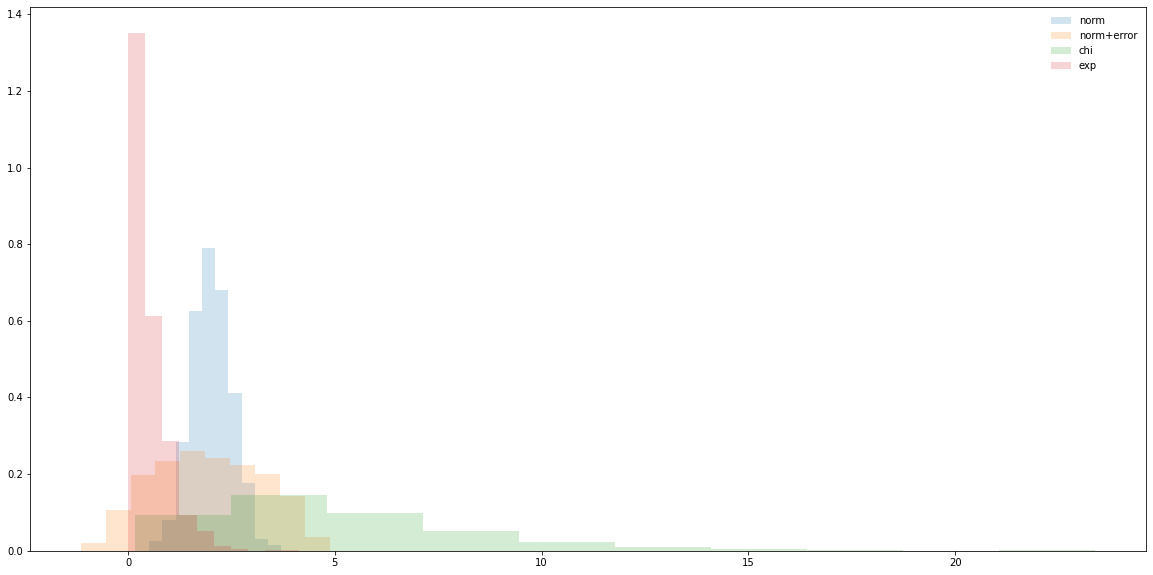

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

plt.hist(norm, histtype='stepfilled', alpha=0.2, density=True, label='norm')
plt.hist(norm2, histtype='stepfilled', alpha=0.2, density=True, label='norm+error')
plt.hist(chi, histtype='stepfilled', alpha=0.2, density=True, label='chi')
plt.hist(exp, histtype='stepfilled', alpha=0.2, density=True, label='exp')
ax.legend(loc='best', frameon=False)
plt.show()

In [23]:
# Liczba obserwacji (wielkość próby) dla każdego eksperymentu
n = 5000  

# Liczba powtórzeń testu Shapiro-Wilka
k = 10000  

# Lista do przechowywania wyników testu normalności (odrzucenie hipotezy zerowej)
rej = []  

# Pętla symulująca wielokrotne testowanie normalności danych
for i in range(k):
    # Generowanie próby z rozkładu normalnego o średniej 2 i odchyleniu standardowym 0.5
    norm = stats.norm.rvs(size=n, loc=2, scale=0.5)
    
    # Wykonanie testu Shapiro-Wilka i sprawdzenie wartości p (drugi element wyniku)
    # Jeżeli p < 0.05, odrzucamy hipotezę zerową o normalności rozkładu
    rej.append(stats.shapiro(norm)[1] < 0.05)

# Obliczenie odsetka odrzuconych hipotez zerowych (proporcja testów, gdzie p < 0.05)
odsetek_odrzuconych = sum(rej) / k  

# Wyświetlenie wyniku
print("Proporcja odrzuconych hipotez zerowych:", odsetek_odrzuconych)

Proporcja odrzuconych hipotez zerowych: 0.0409


Jak widzimy, trzymamy poziom istotności. 

In [26]:
n = 5000
k = 10000
rej = []
for i in range(k):
  cau = stats.cauchy.rvs(size=n)
  rej.append(stats.shapiro(cau)[1] > 0.05)
sum(rej)/k

np.float64(0.0)

0.0 - innymy słowy "ani razu się nie pomyliliśmy" 

- Rozkład Cauchy'ego jest znany ze swoich „grubych ogonów” (duża liczba wartości odstających).
- Test Shapiro-Wilka jest wrażliwy na wartości odstające, dlatego dla rozkładu Cauchy'ego prawdopodobieństwo uzyskania wartości p > 0.05 jest praktycznie zerowe.
- Wynik 0.0 oznacza, że test zawsze poprawnie wykrywa brak normalności w rozkładzie Cauchy'ego.
  
**Wniosek:** Rozkład Cauchy'ego znacznie odbiega od normalności, a test Shapiro-Wilka dobrze to wykrywa.

In [27]:
n = 5000
k = 10000
rej = []
for i in range(k):
  norm2 = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-0.6, scale=1.2)
  rej.append(stats.shapiro(norm2)[1] > 0.05)
sum(rej)/k

np.float64(0.7588)

W tym przypadku próbka jest sumą:
* Rozkładu normalnego o średniej 2 i odchyleniu standardowym 0.5.
* Rozkładu jednostajnego z przedziału [-0.6, 0.6].
* Rozkład wynikowy nie jest już rozkładem normalnym. Rozkład jednostajny wprowadza dodatkowy „szum”, który rozmywa idealny kształt rozkładu normalnego

W około 75.88% przypadków test Shapiro-Wilka nie wykrywał znaczącego odstępstwa od normalności, mimo że rzeczywiście rozkład nie jest czysto normalny.
W przypadku sumy rozkładów normalnego i jednostajnego odchylenia są subtelne, co zwiększa prawdopodobieństwo błędu testu Shapiro-Wilka.

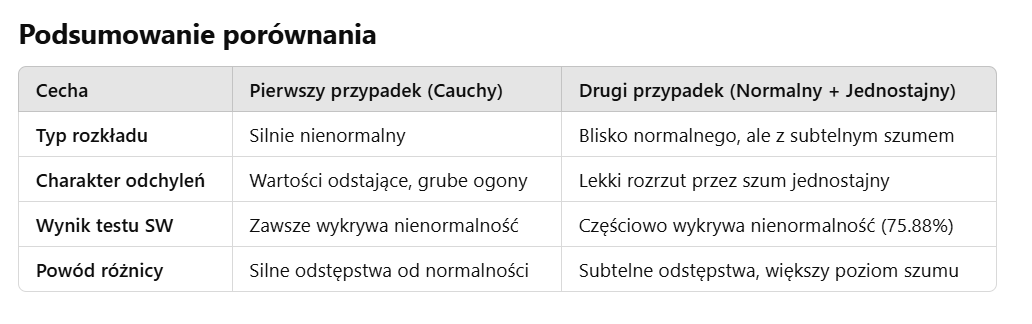

In [25]:
#patrzymy ile razy nie odrzucamy, gdy powinniśmy odrzucić (błąd 2 rodzaju)

n = 5000
k = 10000
rej = []
for i in range(k):
  chi2 = stats.chi2.rvs(size=n, df=5)
  rej.append(stats.shapiro(chi2)[1] > 0.05)
sum(rej)/k
#to może zależeć od tego jak rozkład który nie jest normalny może być podobny do normalnego 

np.float64(0.0)

## Zadanie
Wygeneruj kilka próbek z rozkładu normalnego dla różnych parametrów $\mu$ i $\sigma$ i dla różnej liczności próbki i sprawdź ile razy zostanie odrzucona hipoteza o normalności rozkładu. 
<br> Przyjmij poziom istotności 0.05.

* Dla każdej wartości próby n (5, 10, 20, ..., 5000) wykonujesz 50 niezależnych testów Shapiro-Wilka.

In [28]:
alpha = 0.05

mu = np.linspace(-5, 5, 50)
sigma = np.round(stats.uniform.rvs(size=50, loc=0, scale=2), 2)
nobs = [5, 10, 20, 50, 100, 500, 1000]

for n in nobs:
    reject = 0
    print("---------------------------------")
    for m, s in zip(mu, sigma):
        x = stats.norm.rvs(size=n, loc=m, scale=s)
        pval = stats.shapiro(x)[1]
        print("P-value testu Shapiro-Wilka dla mu={}, sigma={}, n={}: {}".format(m, s, n, pval))
        if pval < alpha: reject += 1
    print("---------------------------------")
    print("Hipoteza o normalności została odrzucona {} razy dla n={}".format(reject, n))

    #dla dużych próbek ok, fałszywie odrzuca mniej niż alpha*n razy

---------------------------------
P-value testu Shapiro-Wilka dla mu=-5.0, sigma=0.48, n=5: 0.7594891202582656
P-value testu Shapiro-Wilka dla mu=-4.795918367346939, sigma=0.57, n=5: 0.6775211968815454
P-value testu Shapiro-Wilka dla mu=-4.591836734693878, sigma=0.01, n=5: 0.14944767972273942
P-value testu Shapiro-Wilka dla mu=-4.387755102040816, sigma=1.46, n=5: 0.3416299177322191
P-value testu Shapiro-Wilka dla mu=-4.183673469387755, sigma=1.73, n=5: 0.09760057084176994
P-value testu Shapiro-Wilka dla mu=-3.979591836734694, sigma=0.48, n=5: 0.08934730136733829
P-value testu Shapiro-Wilka dla mu=-3.7755102040816326, sigma=1.02, n=5: 0.3855783017007972
P-value testu Shapiro-Wilka dla mu=-3.571428571428571, sigma=1.8, n=5: 0.4061012763427192
P-value testu Shapiro-Wilka dla mu=-3.36734693877551, sigma=1.88, n=5: 0.428394793771919
P-value testu Shapiro-Wilka dla mu=-3.163265306122449, sigma=0.03, n=5: 0.9146589287991298
P-value testu Shapiro-Wilka dla mu=-2.9591836734693877, sigma=0.35, n

## Zadanie
Wygeneruj kilka próbek z rozkładu normalnego dla różnych parametrów $\mu$ i $\sigma$ i dla różnej liczności próbki. 

Przy generowaniu próbki dodaj pewien błąd. Sprawdź ile razy zostanie odrzucona hipoteza o normalności rozkładu. Przyjmij poziom istotności 0.05.

In [ ]:
mu = np.linspace(-5, 5, 50)
sigma = np.round(stats.uniform.rvs(size=50, loc=0, scale=1), 2)
nobs = [5, 10, 20, 50, 100, 500, 5000]

for n in nobs:
    print("---------------------------------")
    reject = 0
    for m, s in zip(mu, sigma):
        x = stats.norm.rvs(size=n, loc=m, scale=s) + stats.uniform.rvs(size=n, loc=-2, scale=4)
        pval = stats.shapiro(x)[1]
        print("P-value testu Shapiro-Wilka dla mu={}, sigma={}, n={}: {}".format(m, s, n, pval))
        if pval < alpha: reject += 1
    print("---------------------------------")
    print("Hipoteza o normalności została odrzucona {} razy dla n={}".format(reject, n))

---------------------------------
P-value testu Shapiro-Wilka dla mu=-5.0, sigma=0.8, n=5: 0.28525441884994507
P-value testu Shapiro-Wilka dla mu=-4.795918367346939, sigma=0.54, n=5: 0.6765522360801697
P-value testu Shapiro-Wilka dla mu=-4.591836734693878, sigma=0.79, n=5: 0.031577445566654205
P-value testu Shapiro-Wilka dla mu=-4.387755102040816, sigma=0.59, n=5: 0.5427475571632385
P-value testu Shapiro-Wilka dla mu=-4.183673469387755, sigma=0.32, n=5: 0.21525505185127258
P-value testu Shapiro-Wilka dla mu=-3.979591836734694, sigma=0.13, n=5: 0.47387057542800903
P-value testu Shapiro-Wilka dla mu=-3.7755102040816326, sigma=0.02, n=5: 0.012519503943622112
P-value testu Shapiro-Wilka dla mu=-3.571428571428571, sigma=0.6, n=5: 0.9736552238464355
P-value testu Shapiro-Wilka dla mu=-3.36734693877551, sigma=0.89, n=5: 0.5750726461410522
P-value testu Shapiro-Wilka dla mu=-3.163265306122449, sigma=0.45, n=5: 0.13398802280426025
P-value testu Shapiro-Wilka dla mu=-2.9591836734693877, sigma=0.

**Wniosek:**
- dla małych próbek nawet duże odstępstwa od rozkładu normalnego nie są wykrywane przez test Shapiro-Wilka.
- dla dużych próbek test odrzuca hipotezę zerową nawet przy małych odstępstwach od rozkładu normalnego (wówczas lepiej opierać się na metodach graficznych).

## 📊 Metody graficzne

- histogram (z naniesionym fitem rozkładu normalnego)

- $qq$-plot:
    * oś x - teoretyczne kwantyle z rozkładu normalnego
    * oś y - empiryczne kwantyle wyznaczone na podstawie próby; punkty na wykresie powinny układać wzdłuż prostej $y=x$.

In [29]:
stats.norm.fit

<bound method norm_gen.fit of <scipy.stats._continuous_distns.norm_gen object at 0x00000218FFED9040>>

In [38]:
n = 100

norm = stats.norm.rvs(size=n, loc=2, scale=0.5) 
norm_error = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-0.6, scale=2)
chi = stats.chi2.rvs(size=n, df=5)
exp = stats.expon.rvs(size=n, scale=1/2)

### 📊 **Czym są kwantyle empiryczne?**
* **Kwantyl** to wartość, poniżej której znajduje się określony procent danych. 
* *Kwantyle empiryczne* to wartości, które dzielą uporządkowane dane na części o określonym procentowym udziale. <br> Są one obliczane bezpośrednio na podstawie danych z próby (stąd nazwa „empiryczne”) i służą do analizy rozkładu danych.

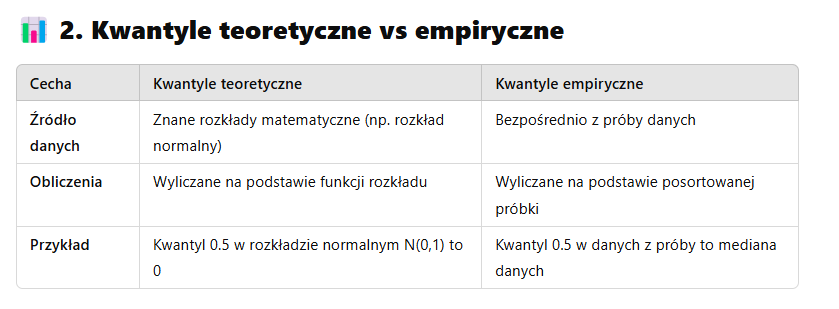


ShapiroResult(statistic=np.float64(0.9934750142152265), pvalue=np.float64(0.9149926846940556))


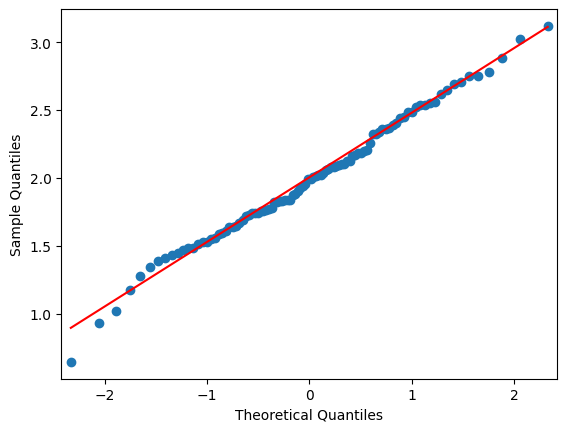

In [35]:
sm.qqplot(norm, stats.norm, line='q')
print(stats.shapiro(norm))
plt.show()

### 📈 Kwantyle empiryczne na Q-Q Plocie
* Oś X (kwantyle teoretyczne): Pochodzą z rozkładu teoretycznego (np. normalnego).
* Oś Y (kwantyle empiryczne): Pochodzą bezpośrednio z danych próbki.

Interpretacja Q-Q Plota:
> Jeśli kwantyle empiryczne pasują do kwantyli teoretycznych, dane są zgodne z rozkładem teoretycznym.<br>
> Odstępstwa od linii prostej sugerują różnice między rozkładem danych a rozkładem teoretycznym.

ShapiroResult(statistic=np.float64(0.9815685184215134), pvalue=np.float64(0.1758107791122443))


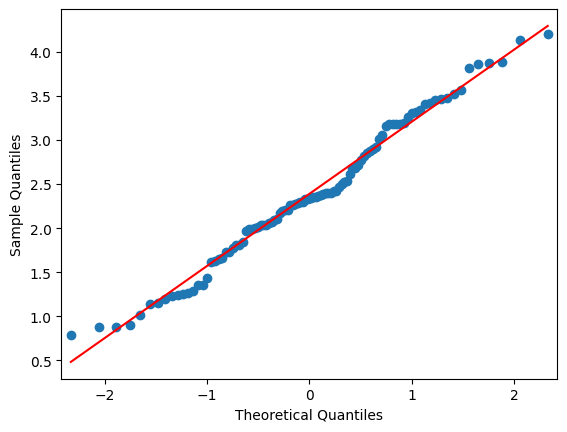

In [39]:
sm.qqplot(norm_error, stats.norm, line='q')
print(stats.shapiro(norm_error))
plt.show()

Niestety, patrząc graficznie na to "damy się oszukać". Dlatego spróbujmy zwiększyć próbkę.

ShapiroResult(statistic=np.float64(0.9978964955014776), pvalue=np.float64(1.6078684984218984e-10))


c:\Users\racha\Desktop\BOOTCAMP\analiza_danych_wielowymiarowych\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10000.
  res = hypotest_fun_out(*samples, **kwds)


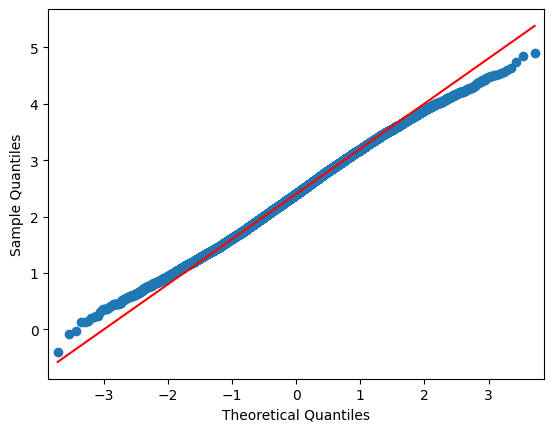

In [40]:
n = 10_000
norm_error = stats.norm.rvs(size=n, loc=2, scale=0.5) + stats.uniform.rvs(size=n, loc=-0.6, scale=2)

sm.qqplot(norm_error, stats.norm, line='q')
print(stats.shapiro(norm_error))
plt.show()

## Zadanie
Wygeneruj kilka próbek o różnej liczności z 

a) rozkładu normalnego,

b) rozkładu chi-kwadrat,

c) rozkładu wykładniczego,

sporządź histogramy z naniesionym filtrem rozkładu normalnego oraz wykresy $qq$-plot. Na podstawie otrzymanych rysunków oceń czy rozkład jest normalny.

In [41]:
n = 10000
norm = stats.norm.rvs(size=n, loc=2, scale=0.5) 
norm_error = norm + stats.uniform.rvs(size=n, loc=-0.6, scale=1.2)
chi = stats.chi2.rvs(size=n, df=5)
exp = stats.expon.rvs(size=n, scale=1/2)

2.0057427201794753 0.4941748413875357
2.002731886535255 0.6079188559668384
4.977041215995937 3.1640127352317444
0.49731409487283906 0.48807499656277786


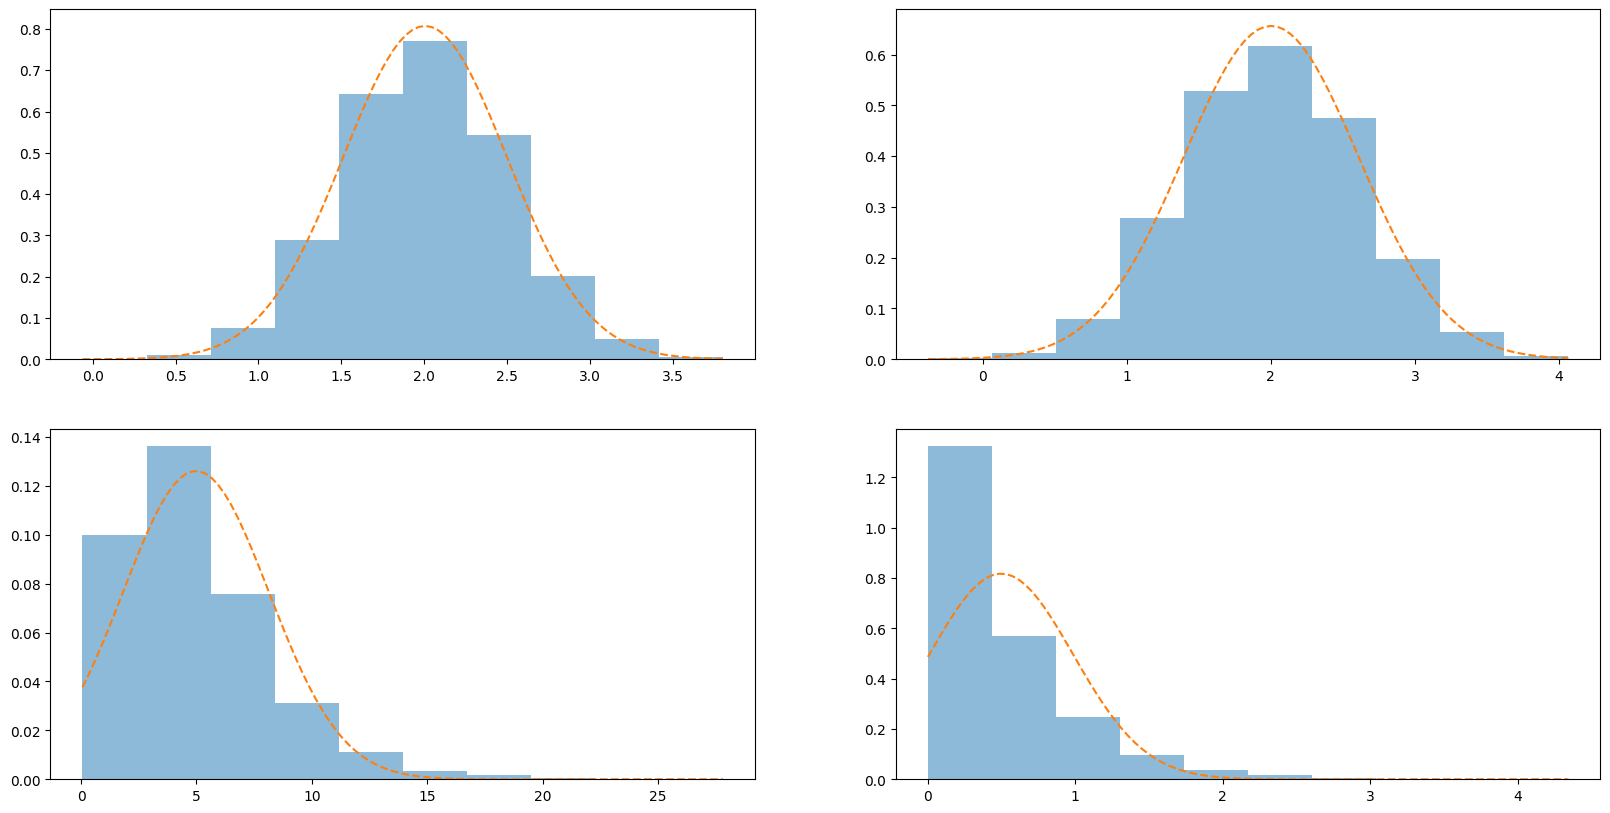

In [42]:
# histogram z naniesionym filtrem rozkładu normalnego
m1, s1 = stats.norm.fit(norm)
print(m1, s1)
m2, s2 = stats.norm.fit(norm_error)
print(m2, s2)
m3, s3 = stats.norm.fit(chi)
print(m3, s3)
m4, s4 = stats.norm.fit(exp)
print(m4, s4)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
N_bins = 10

x_range = np.linspace(norm.min(), norm.max(), 100)
ax[0, 0].hist(norm, bins=N_bins, density=True, alpha=0.5)
ax[0, 0].plot(x_range, stats.norm.pdf(x_range, m1, s1), '--')

x_range = np.linspace(norm_error.min(), norm_error.max(), 100)
ax[0, 1].hist(norm_error, bins=N_bins, density=True, alpha=0.5)
ax[0, 1].plot(x_range, stats.norm.pdf(x_range, m2, s2), '--')

x_range = np.linspace(chi.min(), chi.max(), 100)
ax[1, 0].hist(chi, bins=N_bins, density=True, alpha=0.5)
ax[1, 0].plot(x_range, stats.norm.pdf(x_range, m3, s3), '--')

x_range = np.linspace(exp.min(), exp.max(), 100)
ax[1, 1].hist(exp, bins=N_bins, density=True, alpha=0.5)
ax[1, 1].plot(x_range, stats.norm.pdf(x_range, m4, s4), '--')

ShapiroResult(statistic=np.float64(0.9998455875591599), pvalue=np.float64(0.7592135693082145))


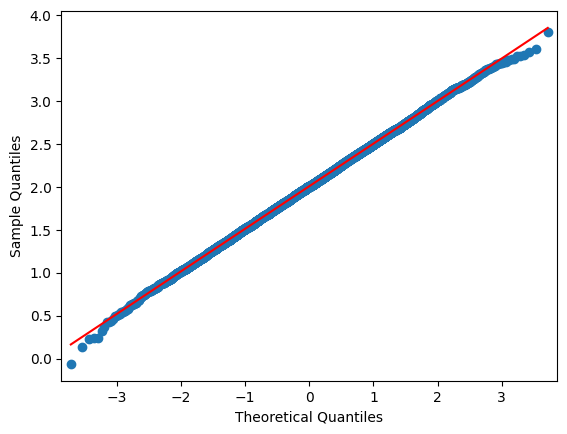

In [43]:
sm.qqplot(norm, stats.norm, line='q')
print(stats.shapiro(norm))
plt.show()

ShapiroResult(statistic=np.float64(0.9996541523300259), pvalue=np.float64(0.07284387535669228))


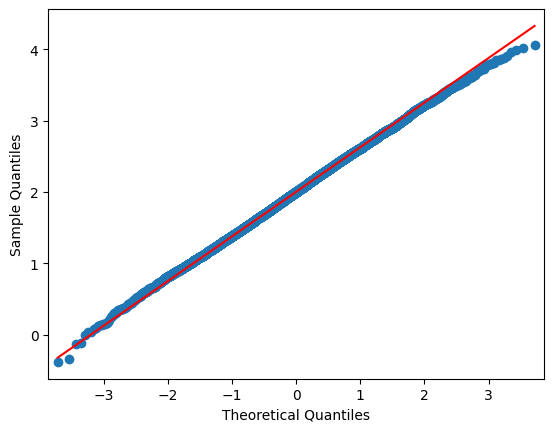

In [44]:
sm.qqplot(norm_error, stats.norm, line='q')
print(stats.shapiro(norm_error))
plt.show()

ShapiroResult(statistic=np.float64(0.9142427962010858), pvalue=np.float64(1.996884685040588e-59))


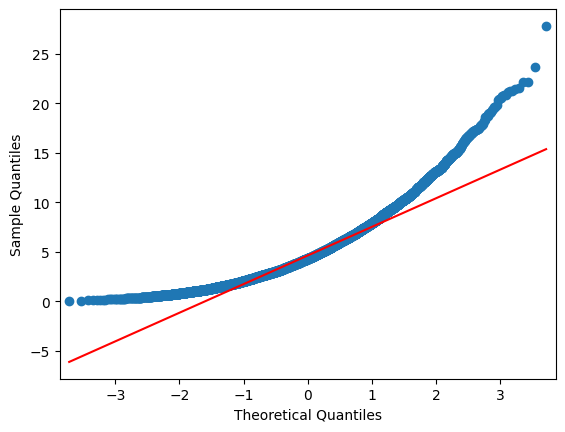

In [45]:
sm.qqplot(chi, stats.norm, line='q')
print(stats.shapiro(chi))
plt.show()

ShapiroResult(statistic=np.float64(0.8269498543960034), pvalue=np.float64(1.7831702544674568e-73))


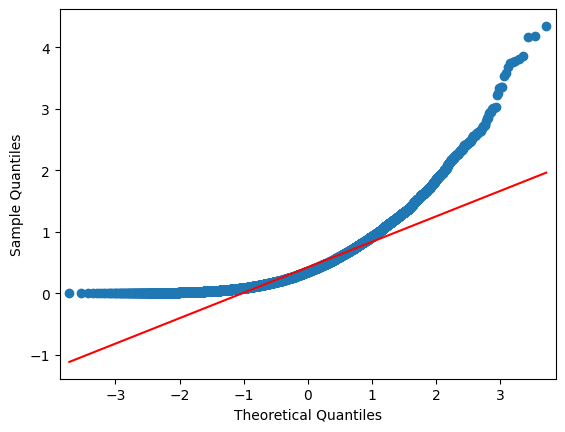

In [46]:
sm.qqplot(exp, stats.norm, line='q')
print(stats.shapiro(exp))
plt.show()

## Inne testy do badania normalności

* testy oparte na kurtozie i skośności:
    - [test D'Agostino $K^2$](https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test): `scipy.stats.normaltest`;

    - [test Jarque–Bera](https://en.wikipedia.org/wiki/Jarque%E2%80%93Bera_test): `scipy.stats.jarque_bera`;
    
* testy oparte na dystrybuancie empirycznej:
    - [test Kolmogorova–Smirnova](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test): `scipy.stats.kstest`;
    
    - [test Lilliefors](https://en.wikipedia.org/wiki/Lilliefors_test): `statsmodels.stats.diagnostic.lilliefors`;


## 🧠 **1. Test D'Agostino i Pearson'a (D'Agostino's K² Test)**

### 📌 **Cel testu:**  
- Sprawdzenie, czy próbka danych pochodzi z rozkładu normalnego.  
- Analizuje **skośność (skewness)** i **kurtozę (kurtosis)** danych.

### 📚 **Własności:**
1. **Hipoteza zerowa (H₀):** Dane pochodzą z rozkładu normalnego.  
2. **Hipoteza alternatywna (H₁):** Dane nie pochodzą z rozkładu normalnego.  
3. **Metoda:** Test łączy dwa wskaźniki:
   - **Skośność:** Miara asymetrii rozkładu.  
   - **Kurtoza:** Miara spłaszczenia lub „grubości ogonów” rozkładu.

### 📊 **Kiedy stosować?**
- **Próby średniej wielkości (n = 20–1000).**  
- Jest bardziej skuteczny niż test Shapiro-Wilka przy większych próbach.  
- Wrażliwy na **asymetrię i nieprawidłowości w ogonach rozkładu.**

### ⚠️ **Ograniczenia:**  
- Test wymaga wystarczająco dużej próby (zwykle >20).  
- Przy bardzo dużych próbach (n > 5000) może stać się nadwrażliwy, podobnie jak test Shapiro-Wilka.

---

## 🧠 **2. Test Jarque-Bera**

### 📌 **Cel testu:**  
- Sprawdzenie, czy dane mają cechy rozkładu normalnego.  
- Bazuje na **skośności (skewness)** i **kurtozie (kurtosis)**, ale w innej formule niż test D'Agostino.

### 📚 **Własności:**
1. **Hipoteza zerowa (H₀):** Dane pochodzą z rozkładu normalnego.  
2. **Hipoteza alternatywna (H₁):** Dane nie pochodzą z rozkładu normalnego.  
3. **Metoda:** Test bada, czy skośność i kurtoza są zbliżone do wartości oczekiwanych dla rozkładu normalnego:
   - **Skośność = 0** (idealna symetria)  
   - **Kurtoza = 3** (typowe dla rozkładu normalnego)

### 📊 **Kiedy stosować?**
- **Dla średnich i dużych prób (n > 50).**  
- Często używany w analizie danych finansowych i ekonometrycznych.  
- Jest mniej czuły na małe odstępstwa w małych próbach.

### ⚠️ **Ograniczenia:**  
- Test może być mało wiarygodny przy **bardzo małych próbach (n < 50)**.  
- Bardziej czuły na odchylenia w ogonach rozkładu niż na asymetrię.

---

## 📊 **3. Porównanie testów**

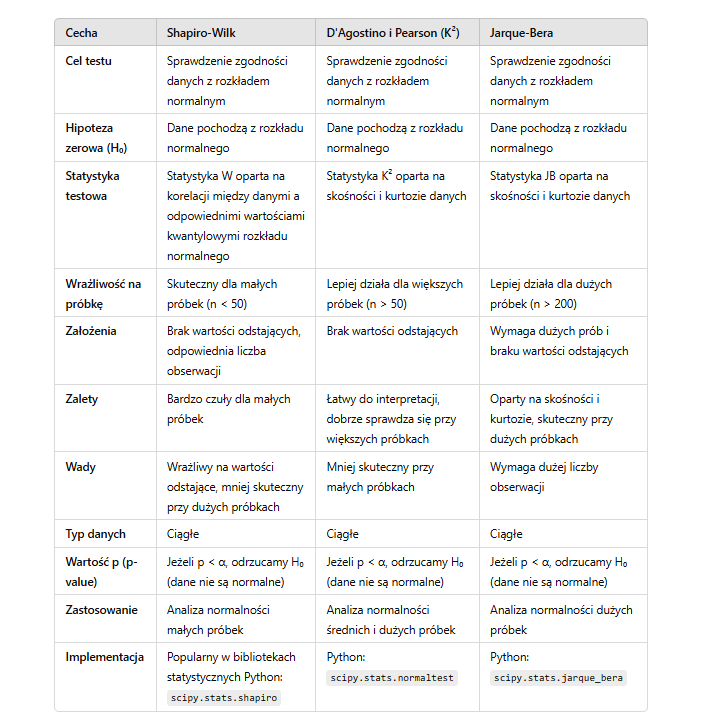


## Test typu omnibus D’Agostino-Pearsona oparty o kurtozę i skośność
Łącząc dwa testy otrzymuje się test czuły na odstępstwa od normalności zarówno w postaci niezerowej skośności jak i kurtozy istotnie różniej od 3.

Statystyką testową jest
$$
K^2=(Z(\sqrt{b_1}))^2+ (Z(b_2))^2,
$$
gdzie $Z(\sqrt{b_1})$ to  statystyka  testowa  testu  opartego  o  skośność  a $Z(b_2)$  to  statystyka  testowa  testu opartego o kurtozę.

Asymptotyczny rozkład tej statystyki to rozkład $\chi^2$.

Ponadto:
$m_k = \frac{1}{n}\sum_{i=1}^n (x_i -\overline{x})^k$, $\sqrt{b_1} = \frac{m_3}{m_2^{3/2}}$, $b_2 = \frac{m4}{m_2^2}-3$.

## Test typu omnibus Jarque-Bera oparty o kurtozę i skośność
Innym testem opartym o kurtozę i skośność jest test Jarque-Bera. Statystyka testowaw przypadku tego testu ma łatwiejszą postać niż dla testu D’Agostino-Pearsona. Traci się jednak na niedokładnym oszacowaniu wartości krytycznych przy niewielkich wielkościach próby. Asymptotycznie ten test jest tak samo mocny jak test D’Agostino-Pearsona, ale na asymptotykę można liczyć jedynie w przypadku dużych prób.

Statystyka testowa ma postać:
$$
    \text{JB} = \frac{n}{6}\Big((\sqrt{b_1})^2 + \frac{1}{4}(b_2-3)^2\Big).
$$


## Test Kołmogorova-Smirnova

Test oparty o odległość supremum pomiędzy dystrybuantami empiryczną $F_n$ i teoretyczną $F$
$$
d(F_n, F) = \sup_{x}|F_n(x) - F(x)|.
$$

Statystka testowa oparta o powyższą odległość sprowadza się do liczenia maksimum modułu różnicy dystrybuant w punktach skoku dystrybuanty empirycznej:
$$
D = \max_{x_i}|F_n(x_i) - F(x_i)|.
$$

Rozkład statystyki testowej można wyznaczyć w sposób dokładny dla prostej hipotezy zerowej, a więc dla porównania z jednym określonym rozkładem. Asymptotycznie, ta statystyka przemnożona przez $\sqrt{n}$ ma rozkład Kołmogorowa.

Test ten pomimo łatwego opisu probabilistycznego nie jest stosowany z uwagi na moc niższą niż konkurencja.

## Test Lillieforsa

Ten test to modyfikacja testu Kołmogorowa-Smirnowa zaproponowana przez Huberta Lillieforsa, pozwalająca na testowanie zgodności z całą rodziną rozkładów normalnych, bez znajomości parametrów średniej i odchylenia standardowego (test Kołmogorowa-Smirnowa pozwala na zbadanie zgodnościz jednym określonym rozkładem).

Statystyka testowa w przypadku testu Lillieforsa wygląda tak samo jak w przypadku testu Kołmogorowa-Smirnowa. Różnica polega na zastosowaniu innego rozkładu dla statystyki testowej (przybliżenie rozkładu dokładnego), uwzględniającego to, że hipoteza zerowa jest hipotezą złożoną.

In [48]:
help(stats.kstest)

Help on function kstest in module scipy.stats._stats_py:

kstest(rvs, cdf, args=(), N=20, alternative='two-sided', method='auto', *, axis=0, nan_policy='propagate', keepdims=False)
    Performs the (one-sample or two-sample) Kolmogorov-Smirnov test for
    goodness of fit.

    The one-sample test compares the underlying distribution F(x) of a sample
    against a given distribution G(x). The two-sample test compares the
    underlying distributions of two independent samples. Both tests are valid
    only for continuous distributions.

    Parameters
    ----------
    rvs : str, array_like, or callable
        If an array, it should be a 1-D array of observations of random
        variables.
        If a callable, it should be a function to generate random variables;
        it is required to have a keyword argument `size`.
        If a string, it should be the name of a distribution in `scipy.stats`,
        which will be used to generate random variables.
    cdf : str, array_like 

In [49]:
help(stats.normaltest)

Help on function normaltest in module scipy.stats._stats_py:

normaltest(a, axis=0, nan_policy='propagate', *, keepdims=False)
    Test whether a sample differs from a normal distribution.

    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.

    Parameters
    ----------
    a : array_like
        The array containing the sample to be tested. Must contain
        at least eight observations.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan_policy : {'propagate', 'omit', 'raise'}
        Defines how to handle input NaNs.

        - `

In [50]:
stats.normaltest(norm_error)

NormaltestResult(statistic=np.float64(6.646035639684208), pvalue=np.float64(0.03604389348174787))

In [52]:
help(stats.jarque_bera)

Help on function jarque_bera in module scipy.stats._stats_py:

jarque_bera(x, *, axis=None, nan_policy='propagate', keepdims=False)
    Perform the Jarque-Bera goodness of fit test on sample data.

    The Jarque-Bera test tests whether the sample data has the skewness and
    kurtosis matching a normal distribution.

    Note that this test only works for a large enough number of data samples
    (>2000) as the test statistic asymptotically has a Chi-squared distribution
    with 2 degrees of freedom.

    Parameters
    ----------
    x : array_like
        Observations of a random variable.
    axis : int or None, default: None
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan_policy : {'propagate', 'omit', 'raise'}
        Defines how to handl

In [ ]:
stats.jarque_bera(norm_error)

Jarque_beraResult(statistic=7.754053300603224, pvalue=0.020712318682074127)

In [ ]:
norm_error_stand = (norm_error - np.mean(norm_error)) / np.std(norm_error, ddof=1)
stats.kstest(norm_error_stand, 'norm')

KstestResult(statistic=0.008188890312417957, pvalue=0.5110983957648201)

In [54]:
help(sm_stats.diagnostic.lilliefors)

Help on function kstest_fit in module statsmodels.stats._lilliefors:

kstest_fit(x, dist='norm', pvalmethod='table')
    Test assumed normal or exponential distribution using Lilliefors' test.

    Lilliefors' test is a Kolmogorov-Smirnov test with estimated parameters.

    Parameters
    ----------
    x : array_like, 1d
        Data to test.
    dist : {'norm', 'exp'}, optional
        The assumed distribution.
    pvalmethod : {'approx', 'table'}, optional
        The method used to compute the p-value of the test statistic. In
        general, 'table' is preferred and makes use of a very large simulation.
        'approx' is only valid for normality. if `dist = 'exp'` `table` is
        always used. 'approx' uses the approximation formula of Dalal and
        Wilkinson, valid for pvalues < 0.1. If the pvalue is larger than 0.1,
        then the result of `table` is returned.

    Returns
    -------
    ksstat : float
        Kolmogorov-Smirnov test statistic with estimated mean a

In [55]:
sm_stats.diagnostic.lilliefors(norm_error, 'norm')

(np.float64(0.007712643126424612), np.float64(0.161739981372727))

## Zadanie
Napisz funkcję, która dla dowolnej próbki zwróci ramkę danych z wyznaczonymi statystykami testowymi i $p$-wartościami dla poznanych testów normalności.

In [ ]:
def normal_tests(x):
    pass

In [ ]:
def normal_tests(x):
    tests = ['Shapiro-Wilk Test', "Omnibus Test", "Jarque–Bera Test", 
             "Kolmogorov–Smirnov Test", "Lilliefors Test"]
    shapiro = stats.shapiro(x)
    omnibus = stats.normaltest(x)
    jarque_bera = stats.jarque_bera(x)
    x_stand = (x - np.mean(x)) / np.std(x, ddof=1)
    ks = stats.kstest(x_stand, 'norm')
    lilliefors = sm_stats.diagnostic.lilliefors(x, 'norm')
    
    statistics = np.round([shapiro[0], omnibus.statistic, jarque_bera[0], ks.statistic, lilliefors[0]], 2)
    pvalues = np.round([shapiro[1], omnibus.pvalue, jarque_bera[1], ks.pvalue, lilliefors[1]], 5)
    
    return pd.DataFrame({
        'test': tests,
        'statistic': statistics,
        'pvalue': pvalues
    })

In [ ]:
normal_tests(norm_error)

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,test,statistic,pvalue
0,Shapiro-Wilk Test,1.00,0.06075
1,Omnibus Test,8.67,0.01307
2,Jarque–Bera Test,7.75,0.02071
3,Kolmogorov–Smirnov Test,0.01,0.51110
4,Lilliefors Test,0.01,0.09796


## Zadanie
Wczytaj dane `mtcars.csv` i sprawdź normalność każdej z kolumn (za pomocą testów statystycznych oraz metod graficznych). 

In [ ]:
mtcars = pd.read_csv("mtcars.csv")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
for col in mtcars.iteritems():
    print("Testy normalności dla zmiennej: {}".format(col[0]))
    print(normal_tests(col[1]))

Testy normalności dla zmiennej: mpg
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.95  0.12288
1             Omnibus Test       2.71  0.25741
2         Jarque–Bera Test       2.24  0.32609
3  Kolmogorov–Smirnov Test       0.13  0.64125
4          Lilliefors Test       0.13  0.22294
Testy normalności dla zmiennej: cyl
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.75  0.00001
1             Omnibus Test      38.53  0.00000
2         Jarque–Bera Test       3.95  0.13901
3  Kolmogorov–Smirnov Test       0.28  0.00945
4          Lilliefors Test       0.28  0.00100
Testy normalności dla zmiennej: disp
                      test  statistic   pvalue
0        Shapiro-Wilk Test       0.92  0.02081
1             Omnibus Test       5.00  0.08207
2         Jarque–Bera Test       2.44  0.29557
3  Kolmogorov–Smirnov Test       0.19  0.15434
4          Lilliefors Test       0.19  0.00362
Testy normalności dla zmiennej: hp
          

## ✅ **Dobre praktyki przy sprawdzaniu normalności danych**

Sprawdzanie normalności rozkładu danych jest kluczowe w wielu analizach statystycznych. Oto najlepsze praktyki, które warto uwzględnić:

---

### 🧠 **1. Używaj więcej niż jednej metody**
- Nie polegaj wyłącznie na jednym teście statystycznym. Wyniki mogą się różnić w zależności od wielkości próbki i wartości odstających.
- **Przykład kombinacji:**  
   - Test statystyczny (np. Shapiro-Wilk, D'Agostino i Pearson, Jarque-Bera)  
   - Wykresy (np. histogram, wykres Q-Q, wykres pudełkowy)

---

### 📊 **2. Wykorzystaj wizualizacje danych**
- **Histogram** – do oceny kształtu rozkładu.  
- **Wykres Q-Q (Quantile-Quantile Plot)** – porównuje kwantyle danych z kwantylami rozkładu normalnego.  
- **Wykres pudełkowy (Boxplot)** – do identyfikacji wartości odstających.

---

### 📏 **3. Uwzględnij wielkość próbki**
- **Małe próbki (n < 50)** → Test Shapiro-Wilk jest bardziej czuły.  
- **Średnie próbki (50 ≤ n ≤ 200)** → Test D'Agostino i Pearson.  
- **Duże próbki (n > 200)** → Test Jarque-Bera lub analiza wizualna.  
- W dużych próbkach nawet małe odchylenia od normalności mogą prowadzić do odrzucenia hipotezy zerowej.

---

### 🚨 **4. Uważaj na wartości odstające (outliery)**
- Wartości odstające mogą znacząco wpłynąć na wyniki testów normalności.  
- Użyj metod wykrywania wartości odstających, takich jak:  
   - Z-score  
   - IQR (interquartile range)  

---

### 🛠️ **5. Normalizacja i transformacje danych**
- Jeśli dane nie spełniają założeń normalności:  
   - **Transformacja Box-Cox** (dla danych dodatnich)  
   - **Transformacja logarytmiczna**  
   - **Transformacja pierwiastkowa (sqrt)**  

---

### 🔄 **6. Uwzględnij kontekst analizy**
- Nie zawsze wymagane jest spełnienie założenia normalności.  
- W analizach nienormalnych danych rozważ testy nieparametryczne, np. **test Kruskala-Wallisa** zamiast ANOVA czy **test U Manna-Whitneya** zamiast t-testu.

---

### 📚 **7. Używaj odpowiednich narzędzi**
- **Python**: `scipy.stats`, `matplotlib`, `seaborn`  
- **R**: `shapiro.test()`, `qqnorm()`, `car::qqPlot()`  

---

### ✅ **Podsumowanie kroków praktycznych:**
1. **Wizualizacja:** Histogram, Q-Q Plot  
2. **Test statystyczny:** Shapiro-Wilk, D'Agostino i Pearson, Jarque-Bera  
3. **Wykrywanie wartości odstających**  
4. **Uwzględnienie wielkości próbki**  
5. **Transformacje danych (jeśli potrzebne)**  
6. **Interpretacja wyników w kontekście analizy**  

Stosowanie tych praktyk pozwoli uzyskać bardziej wiarygodne wyniki analizy normalności i podjąć świadome decyzje dotyczące dalszych kroków w analizie statystycznej. 🚀